In [56]:
# https://omes-va.com/reconocimiento-de-matriculas-vehiculares-opencv-pytesseract-ocr-python/
import cv2
import matplotlib.pyplot as plt
placa = []
import math
import numpy as np

In [57]:
# funciones Filtro Gabor
def build_filters():
 filters = []
 ksize = 31
 for theta in np.arange(0, np.pi, np.pi / 16):
     kern = cv2.getGaborKernel((ksize, ksize), 4.0, theta, 10.0, 0.5, 0, ktype=cv2.CV_32F)
     kern /= 1.5*kern.sum()
     filters.append(kern)
 return filters
 
def process(img, filters):
 accum = np.zeros_like(img)
 for kern in filters:
     fimg = cv2.filter2D(img, cv2.CV_8UC3, kern)
     np.maximum(accum, fimg, accum)
 return accum

In [58]:
image = cv2.imread('test04.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.blur(gray,(3,3))
#cnts,_ = cv2.findContours(canny,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

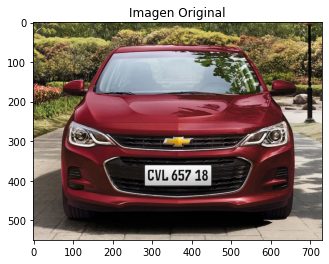

In [59]:
plt.title("Imagen Original") 
plt.imshow(cv2.cvtColor(image , cv2.COLOR_BGR2RGB))

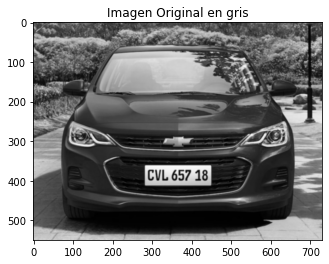

In [60]:
plt.title("Imagen Original en gris") 
plt.imshow(cv2.cvtColor(gray , cv2.COLOR_BGR2RGB))

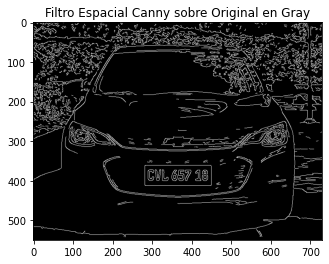

In [61]:
canny = cv2.Canny(gray,150,200)
plt.title("Filtro Espacial Canny sobre Original en Gray") 
plt.imshow(cv2.cvtColor(canny , cv2.COLOR_BGR2RGB))

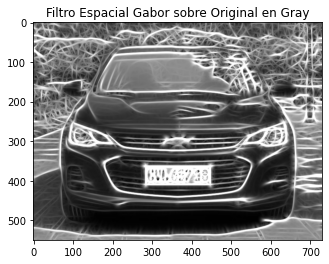

In [62]:
# Filtro Gabor sobre original en Gray
filters = build_filters()
gabor = process(gray, filters)
plt.title("Filtro Espacial Gabor sobre Original en Gray") 
plt.imshow(cv2.cvtColor(gabor , cv2.COLOR_BGR2RGB))

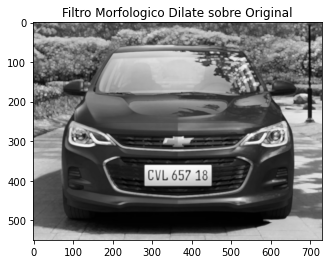

In [63]:
# Convierte Original en Dilate
dilate_canny = cv2.dilate(gray,None,iterations=1)
plt.title("Filtro Morfologico Dilate sobre Original") 
plt.imshow(cv2.cvtColor(dilate_canny , cv2.COLOR_BGR2RGB))

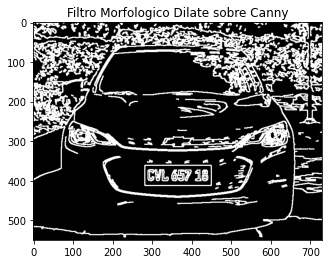

In [64]:
# Convierte Canny en Dilate
dilate_canny = cv2.dilate(canny,None,iterations=1)
plt.title("Filtro Morfologico Dilate sobre Canny") 
plt.imshow(cv2.cvtColor(dilate_canny , cv2.COLOR_BGR2RGB))

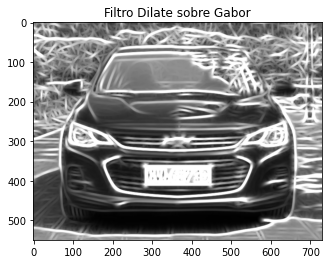

In [65]:
# Convierte Gabor en Dilate
dilate_gabor = cv2.dilate(gabor,None,iterations=1)
plt.title("Filtro Dilate sobre Gabor") 
plt.imshow(cv2.cvtColor(dilate_gabor , cv2.COLOR_BGR2RGB))

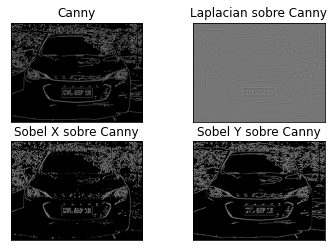

In [68]:
# Convierte Canny a Dilate Laplacian y solbe
laplacian = cv2.Laplacian(gray,cv2.CV_64F)
sobelx = cv2.Sobel(canny,cv2.CV_8U,1,0,ksize=3)
sobely = cv2.Sobel(canny,cv2.CV_8U,0,1,ksize=3)

plt.subplot(2,2,1),plt.imshow(canny,cmap = 'gray')
plt.title('Canny'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian sobre Canny'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X sobre Canny'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y sobre Canny'), plt.xticks([]), plt.yticks([])
 
plt.show()

area= 9007.0


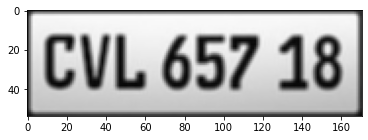

In [69]:

for c in cnts:
  area = cv2.contourArea(c)
  x,y,w,h = cv2.boundingRect(c)
  epsilon = 0.09*cv2.arcLength(c,True)
  approx = cv2.approxPolyDP(c,epsilon,True)
  
  if len(approx)==4 and area>9000:
    print('area=',area)
    #cv2.drawContours(image,[approx],0,(0,255,0),3)
    aspect_ratio = float(w)/h
    if aspect_ratio>2.4:
      placa = gray[y:y+h,x:x+w]
      
      #print('PLACA: ',text)
      #cv2.imshow('PLACA',placa)
      plt.imshow(cv2.cvtColor(placa , cv2.COLOR_BGR2RGB))
      cv2.moveWindow('PLACA',780,10)
      cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),3)
      #cv2.putText(image,text,(x-20,y-10),1,2.2,(0,255,0),3)

-1

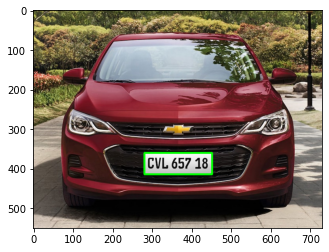

In [70]:
#cv2.imshow('Image',image)
plt.imshow(cv2.cvtColor(image , cv2.COLOR_BGR2RGB))
cv2.moveWindow('Image',45,10)
cv2.waitKey(0)